# **Importing the Libraries**

In [26]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **Checking the Input Directory**

In [27]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# **Loading the Dataset**

In [28]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [29]:
# checking the shape of the dataset
df.shape

(42000, 785)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [31]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3904,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


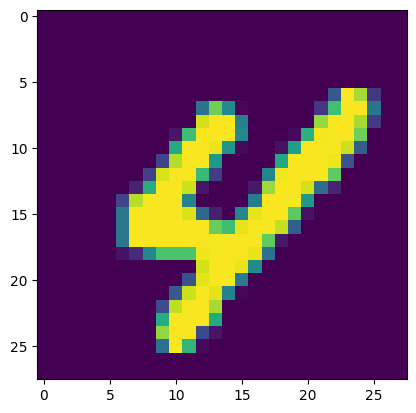

In [33]:
# displaying an image
import matplotlib.pyplot as plt
plt.imshow(
    df.iloc[17580, 1:].values.reshape(28, 28)
)

# **Separating Features and Target**

In [34]:
X = df.iloc[ :, 1: ]
y = df.iloc[ :, 0 ]

# **Performance without PCA**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [36]:
X_train.shape

(33600, 784)

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train, y_train )

KNeighborsClassifier()

In [39]:
start = time.time()
y_pred = knn.predict(X_test)
print( time.time() - start )

13.530910015106201


In [40]:
accuracy_score(y_test,y_pred)

0.9648809523809524

# **Performance with PCA**

In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform( X_test )

## **Finding the optimum number of Principal Component**

In [43]:
def getNumComponents(X_train, X_test):
    pca = PCA(n_components=None)
    
    X_train_trf = pca.fit_transform(X_train)
    y_test_trf = pca.transform(X_test)

    contributions = pca.explained_variance_ratio_

    sum = 0
    comp = 0

    for curr in contributions:
        sum += ( curr * 100 )
        comp += 1
        if sum >= 90.0 :
            break
    return comp

In [44]:
def performPCA(X_train, X_test, y_train, y_test):
    comp = getNumComponents(X_train, X_test)
    print("No. of components", comp)
    pca = PCA( n_components = comp )

    # Eigen values
    # print( pca.explained_variance_ )

    # Eigen Vectors
    # print( pca.components_ )

    # How much each component contributes
    # print( pca.explained_variance_ratio_ )
    
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    
    start = time.time()
    y_pred = knn.predict(X_test_trf)
    print( "Time take in seconds", time.time() - start )

    print("Accuracy: ", accuracy_score(y_test, y_pred))

In [45]:
performPCA(X_train, X_test, y_train, y_test)

No. of components 223
Time take in seconds 2.8472940921783447
Accuracy:  0.9494047619047619


# **Transforming into a 2D Coordinate System**

In [46]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [47]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(
        x=X_train_trf[:,0],
        y=X_train_trf[:,1],
        color=y_train_trf,
        color_discrete_sequence=px.colors.qualitative.G10
    )
fig.show()

# **Transforming into a 3D Coordinate System**

In [48]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [49]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(
        df,
        x = X_train_trf[:,0],
        y = X_train_trf[:,1],
        z = X_train_trf[:,2],
        color = y_train_trf
    )

fig.update_layout(
    margin = dict( 
                l=20,
                r=20,
                t=20,
                b=20
            ),
    paper_bgcolor = "LightSteelBlue",
)
fig.show()